In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats.mstats import winsorize

In [3]:
plt.style.use("ggplot")   #used to create plots-Grammar of Graphics
df=pd.read_csv("final_data.csv")
#print(df)
print(df.duplicated().sum())
# print(df.shape)
df = df[df['Country'] == 'India']
df=df.drop(columns='Country')  #to drop the column country

0


In [5]:
df.head()

Year       Region   Crop_Type  Average_Temperature_C  \
0  2001  West Bengal        Corn                   1.55   
1  1998   Tamil Nadu   Sugarcane                   2.19   
2  2012       Punjab       Wheat                  32.08   
3  2016  West Bengal    Soybeans                  14.00   
4  2007  West Bengal  Vegetables                  27.45   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 1627.48             11.81                 1.080   
2                 1233.10              6.10                 2.990   
3                 1240.49             29.18                 4.032   
4                  784.04              5.55                 2.600   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       9                95.75                    44.35   
2                       1                45.87                    10.09   
3                       9                29.32                    37.80   
4                       6                89.47                    28.15   

   Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
0                     14.78              83.25      Water Management   
1                     88.08              49.61         Crop Rotation   
2                     32.54              42.31      Water Management   
3                     99.09              46.32         No Adaptation   
4                     86.71              33.12      Water Management   

   Economic_Impact_Million_USD  
0                       808.13  
1                       401.72  
2                       761.89  
3                      1745.39  
4                       308.77

In [7]:
#scaling 
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.difference(['Economic_Impact_Million_USD','Year'])
df[numeric_columns] = StandardScaler().fit_transform(df[numeric_columns])

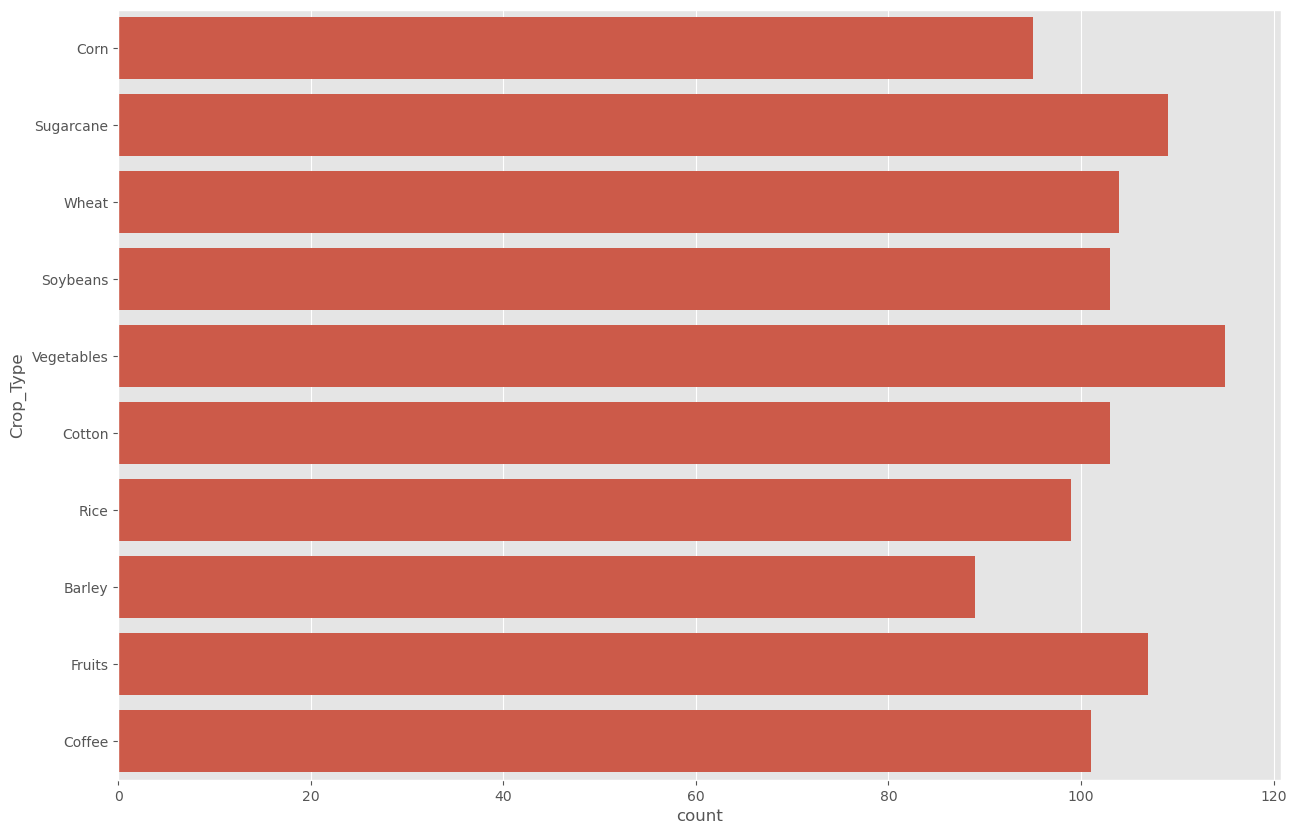

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(y = df['Crop_Type'])
plt.show()

In [11]:
#storing the crop ,region names with the encoded values
crops_encoding=dict(enumerate(df['Crop_Type'].astype('category').cat.categories))
region_encoding=dict(enumerate(df['Region'].astype('category').cat.categories))
adaptation_encoding=dict(enumerate(df['Adaptation_Strategies'].astype('category').cat.categories))

In [13]:
#crops and region encoding
df['Crop_Type'] = df['Crop_Type'].astype('category').cat.codes
df['Region'] = df['Region'].astype('category').cat.codes
df['Adaptation_Strategies'] = df['Adaptation_Strategies'].astype('category').cat.codes

In [15]:
#if any missing values then replacing by mean
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

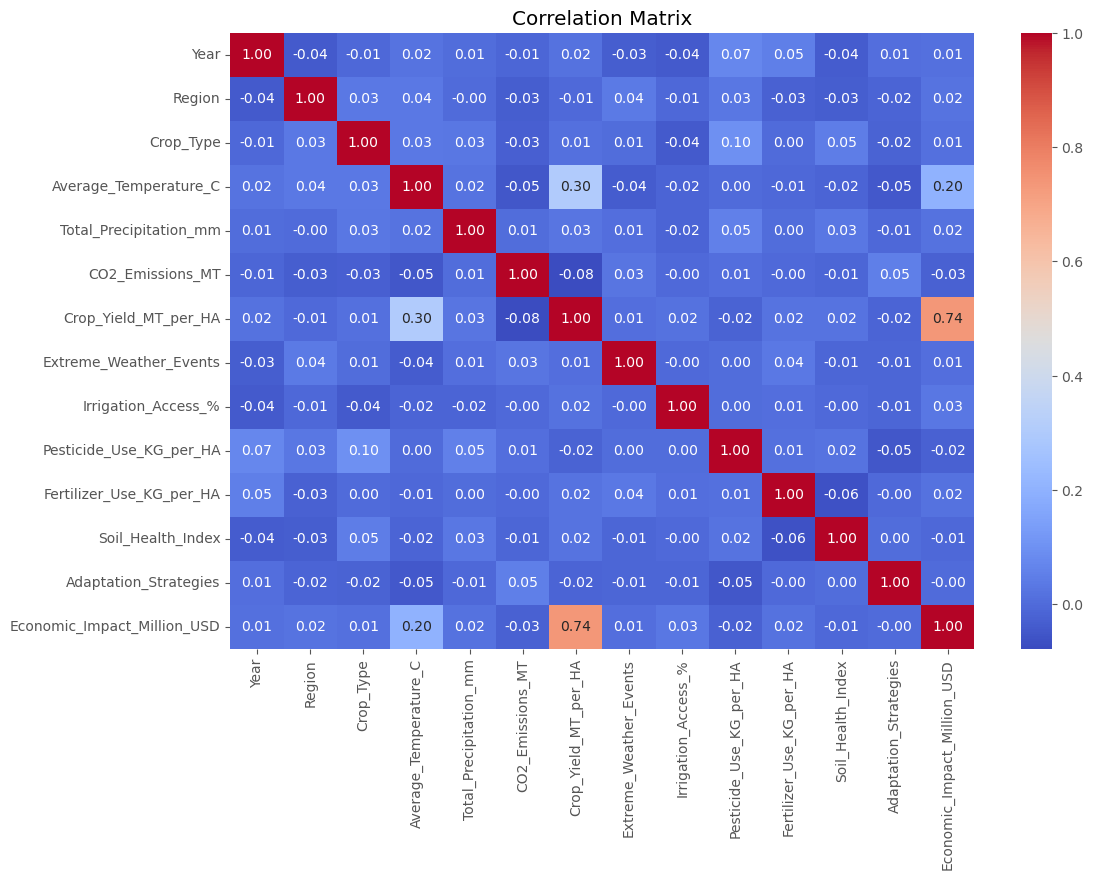

In [17]:
correlation_matrix = df.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [19]:
df=df.drop(columns=['Year','CO2_Emissions_MT','Pesticide_Use_KG_per_HA','Soil_Health_Index','Adaptation_Strategies'])

In [21]:
df.head()


Region  Crop_Type  Average_Temperature_C  Total_Precipitation_mm  \
0       3          2              -1.133261               -1.477935   
1       2          7              -1.077992               -0.011477   
2       1          9               1.503238               -0.501423   
3       3          6              -0.058108               -0.492242   
4       3          8               1.103402               -1.059298   

   Crop_Yield_MT_per_HA  Extreme_Weather_Events  Irrigation_Access_%  \
0             -0.505048                1.031978            -1.547745   
1             -1.152421                1.349439             1.532860   
2              0.729593               -1.190244            -0.359278   
3              1.756325                1.349439            -0.987083   
4              0.345307                0.397058             1.294636   

   Fertilizer_Use_KG_per_HA  Economic_Impact_Million_USD  
0                 -1.172372                       808.13  
1                  1.305314                       401.72  
2                 -0.572049                       761.89  
3                  1.677473                      1745.39  
4                  1.259005                       308.77

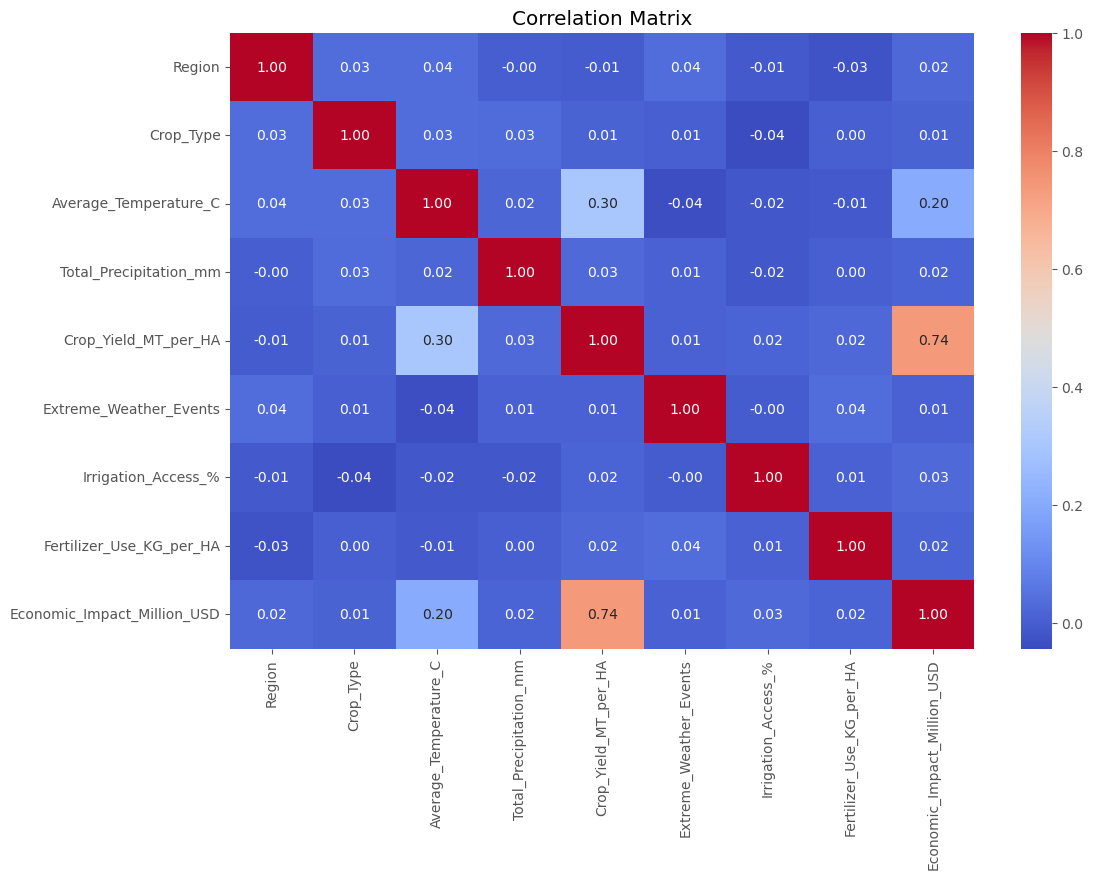

In [23]:
correlation_matrix = df.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [25]:
plt.figure(figsize=(15,10))
sns.histplot(df['Economic_Impact_Million_USD'], kde=True, bins=30)  # Histogram with a kernel density estimate (KDE)
plt.title("Distribution of Economic Impact (Million USD)")
plt.xlabel("Economic Impact (Million USD)")
plt.ylabel("Frequency")
plt.show()

In [29]:
bins = [-np.inf, 10, 20, 30, 40, np.inf]
labels = ['<10°C', '10-20°C', '20-30°C', '30-40°C', '>40°C']
df['Temp_Range'] = df['Average_Temperature_C'].copy()
df['Temp_Range'] = pd.cut(df['Temp_Range'], bins=bins, labels=labels)
plt.figure(figsize=(15,10))
sns.barplot(x='Temp_Range', y='Crop_Yield_MT_per_HA', data=df, errorbar=None)
plt.title("Average Crop Yield per Temperature Range")
plt.xlabel("Temperature Range (°C)")
plt.ylabel("Average Crop Yield (MT per HA)")

Text(0, 0.5, 'Average Crop Yield (MT per HA)')

In [31]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

In [33]:
y = df['Economic_Impact_Million_USD']
x = df.drop(['Economic_Impact_Million_USD','Temp_Range'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle=True)
print(x_train.dtypes)
sc=StandardScaler()
x_train_normalizaed=sc.fit_transform(x_train)
x_test_normalized=sc.transform(x_test)

Region                         int8
Crop_Type                      int8
Average_Temperature_C       float64
Total_Precipitation_mm      float64
Crop_Yield_MT_per_HA        float64
Extreme_Weather_Events      float64
Irrigation_Access_%         float64
Fertilizer_Use_KG_per_HA    float64
dtype: object


In [35]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree' : DecisionTreeRegressor(),
    'KNN' : KNeighborsRegressor()
}

In [37]:
for name, model in models.items():
    model.fit(x_train_normalizaed, y_train)
    y_train_pred = model.predict(x_train_normalizaed)

    # Calculate training error
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Print the training error
    print(f"{name} (Training): MAE: {train_mae}, R²: {train_r2}")

    # Predict on test data
    y_test_pred = model.predict(x_test_normalized)

    # Calculate test error (already implemented)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the test error
    print(f"{name} (Testing): MAE: {test_mae}, R²: {test_r2}")

Linear Regression (Training): MAE: 221.97048990728376, R²: 0.5508592173717844
Linear Regression (Testing): MAE: 221.67702228678803, R²: 0.4742308151527328
Lasso (Training): MAE: 221.83146250124793, R²: 0.5508060658457694
Lasso (Testing): MAE: 221.15273190615932, R²: 0.47589706623529926
Ridge (Training): MAE: 221.9693131061871, R²: 0.5508582893159719
Ridge (Testing): MAE: 221.62501644031454, R²: 0.474460328968317
Decision Tree (Training): MAE: 0.0, R²: 1.0
Decision Tree (Testing): MAE: 322.18326829268295, R²: -0.17467855089217044
KNN (Training): MAE: 208.0375365853659, R²: 0.6061279487510607
KNN (Testing): MAE: 250.79715121951222, R²: 0.3916179000540886


In [39]:
def prediction(
    Average_Temperature_C,
    Region,
    Crop_Type,
    Total_Precipitation_mm,
    Crop_Yield_MT_per_HA,
    Extreme_Weather_Events,
    Irrigation_Access,
    Fertilizer_Use_KG_per_HA
):
    try:
        Region_encoded = list(region_encoding.keys())[list(region_encoding.values()).index(Region)]
        Crop_Type_encoded = list(crops_encoding.keys())[list(crops_encoding.values()).index(Crop_Type)]
    except ValueError as e:
        raise ValueError(f"Error encoding categorical inputs: {e}")
    features = pd.DataFrame([[
        Average_Temperature_C,
        Region_encoded,
        Crop_Type_encoded,
        Total_Precipitation_mm,
        Crop_Yield_MT_per_HA,
        Extreme_Weather_Events,
        Irrigation_Access,
        Fertilizer_Use_KG_per_HA
    ]],columns=x.columns)
    features_scaled = sc.transform(features)

    knn=KNeighborsRegressor()
    #model
    
    knn.fit(x_train_normalizaed,y_train)
    # Predict the yield
    try:
        predicted_yield = knn.predict(features_scaled)
    except Exception as e:
        raise ValueError(f"Error during prediction: {e}")
    # Return the first prediction as a scalar
    return float(predicted_yield[0])

In [41]:
print(prediction(1.55,"West Bengal","Corn",447.06,1.7369999999999999,8,14.54,10.08))

792.616


Actual answer is 808.

In [44]:
print(prediction(14,"West Bengal","Soybeans",1240.49,4.032,9,29.32,99.08))

1010.1299999999999


Actual answer is 1745.

In [48]:
print(prediction(32.57,"Tamil Nadu","Fruits",1713.63,1.818,5,83.29,40.59))	

792.616


The actual answer is 878.84 